# car-consume(線形回帰)
- 100kmあたりのガソリン消費量(consume)を予想
## DAY1

In [26]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画

from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
from sklearn.linear_model import Ridge,Lasso,ElasticNet #正則化項付き最小二乗法を行うためのライブラリ
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
from sklearn.model_selection import KFold # 交差検証法に関する関数


### データの読み込み 

In [12]:
# データ読み込み
df_car = pd.read_excel("../data/car-consume/measurements2.xlsx")

# データの表示
display(df_car)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


In [13]:
df_car.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


### データの中身確認

In [17]:
df_car.info()

#欠損の数を確認
df_car.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
distance         388 non-null float64
consume          388 non-null float64
speed            388 non-null int64
temp_inside      376 non-null float64
temp_outside     388 non-null int64
specials         93 non-null object
gas_type         388 non-null object
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    13 non-null float64
refill gas       13 non-null object
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [7]:
# gas_type
display(df_car["gas_type"].value_counts())

# refill_gas
display(df_car["refill gas"].value_counts())

SP98    228
E10     160
Name: gas_type, dtype: int64

SP98    8
E10     5
Name: refill gas, dtype: int64

### データ整形
#### 不要データを削除

In [8]:
# 不要データを削除
#  └specials ⇒AC/rain/sunで表現済み
#  └refill gas　⇒gas typeと同じ 
drop_columns = ["specials", "refill gas"]
df_car2 = df_car.drop(columns = drop_columns)
#display(df_car2)

# gas_typeをベクトル化
df_car3 = pd.get_dummies(df_car2)

# refill litersのNaNを0で埋める
df_car3["refill liters"] = df_car3["refill liters"].fillna(0)

# temp_insideの欠損は平均で埋める
df_car3["temp_inside"] = df_car3["temp_inside"].fillna(df_car3["temp_inside"].mean())

display(df_car3)

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,gas_type_E10,gas_type_SP98
0,28.0,5.0,26,21.5,12,0,0,0,45.0,1,0
1,12.0,4.2,30,21.5,13,0,0,0,0.0,1,0
2,11.2,5.5,38,21.5,15,0,0,0,0.0,1,0
3,12.9,3.9,36,21.5,14,0,0,0,0.0,1,0
4,18.5,4.5,46,21.5,15,0,0,0,0.0,1,0
5,8.3,6.4,50,21.5,10,0,0,0,0.0,1,0
6,7.8,4.4,43,21.5,11,0,0,0,0.0,1,0
7,12.3,5.0,40,21.5,6,0,0,0,0.0,1,0
8,4.9,6.4,26,21.5,4,0,0,0,0.0,1,0
9,11.9,5.3,30,21.5,9,0,0,0,0.0,1,0


In [9]:
df_car3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
distance         388 non-null float64
consume          388 non-null float64
speed            388 non-null int64
temp_inside      388 non-null float64
temp_outside     388 non-null int64
AC               388 non-null int64
rain             388 non-null int64
sun              388 non-null int64
refill liters    388 non-null float64
gas_type_E10     388 non-null uint8
gas_type_SP98    388 non-null uint8
dtypes: float64(4), int64(5), uint8(2)
memory usage: 28.1 KB


### データの可視化
- 散布図行列
- 相関係数
- 相関係数をヒートマップで可視化
- w0, w1, ..., w10と二乗誤差を表示

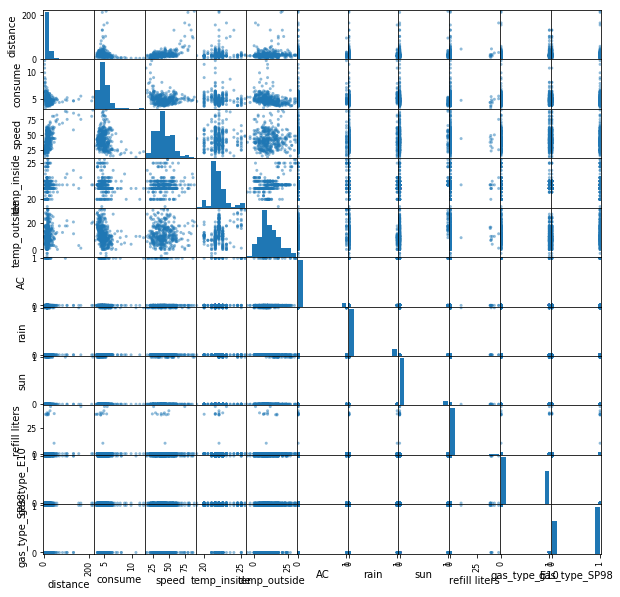

In [25]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df_car3, figsize=(10,10))
plt.show()

In [26]:
# 相関係数を確認
df_car3.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters,gas_type_E10,gas_type_SP98
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.025738,-0.019791,0.081120,0.107045,0.053411,-0.053411
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,0.096591,0.248118,-0.170667,-0.074095,0.015327,-0.015327
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.035408,0.009489,0.081618,-0.007446,0.097360,-0.097360
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.297376,-0.036937,0.242248,-0.021348,-0.010198,0.010198
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.167562,-0.186315,0.346903,-0.041595,-0.148705,0.148705
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,1.000000,0.242915,0.088598,-0.052571,-0.105285,0.105285
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.242915,1.000000,-0.112650,0.033505,-0.060328,0.060328
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.088598,-0.112650,1.000000,-0.054448,-0.022761,0.022761
refill liters,0.107045,-0.074095,-0.007446,-0.021348,-0.041595,-0.052571,0.033505,-0.054448,1.000000,-0.000741,0.000741
gas_type_E10,0.053411,0.015327,0.097360,-0.010198,-0.148705,-0.105285,-0.060328,-0.022761,-0.000741,1.000000,-1.000000


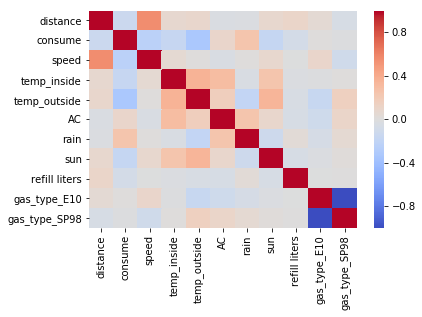

In [19]:
# 相関係数をヒートマップにして可視化
# 正/負の相関を明瞭化(フィードバックを受けて修正)
sns.heatmap(df_car3.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

- gas_type_E10 と gas_type_SP98 は負の相関が強い ⇒ 当たり前か

### とりあえず線形回帰モデル作成

In [20]:
# 係数を求める
y = df_car3["consume"].values
X = df_car3[['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'rain', "sun", "refill liters", "gas_type_E10", "gas_type_SP98"]].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]
w4 = regr.coef_[3]
w5 = regr.coef_[4]
w6 = regr.coef_[5]
w7 = regr.coef_[6]
w8 = regr.coef_[7]
w9 = regr.coef_[8]
w10 = regr.coef_[9]

In [21]:
x1 = df_car3['distance'].values
x2 = df_car3['speed'].values
x3 = df_car3['temp_inside'].values
x4 = df_car3['temp_outside'].values
x5 = df_car3['AC'].values
x6 = df_car3['rain'].values
x7 = df_car3['sun'].values
x8 = df_car3['refill liters'].values
x9 = df_car3['gas_type_E10'].values
x10 = df_car3['gas_type_SP98'].values

# 重みと二乗誤差の確認
y_est = w0 + w1 * x1 + w2 * x2 + w3 * x3 + w4 * x4 + w5 * x5 + w6 * x6 + w7 * x7 + w8 * x8 + w9 * x9 + w10 * x10
squared_error = 0.5 * np.sum((y - y_est) ** 2)
print(f'w0 = {w0:.3f}, w1 = {w1:.3f}, w2 = {w2:.3f}, w3 = {w3:.3f}, w4 = {w4:.3f}, w5 = {w5:.3f}, w6 = {w6:.3f}, w7 = {w7:.3f}, w8 = {w8:.3f}, w9 = {w9:.3f}, w10 = {w10:.3f}')
print(f'二乗誤差 = {squared_error:.3f}')

w0 = 7.708, w1 = 0.003, w2 = -0.019, w3 = -0.076, w4 = -0.040, w5 = 0.446, w6 = 0.533, w7 = -0.147, w8 = -0.015, w9 = 0.018, w10 = -0.018
二乗誤差 = 162.033


### モデル評価

In [24]:
# 値を予測
y_pred = regr.predict(X)

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 0.835
MAE = 0.614
RMSE = 0.914


## DAY2
### ホールドアウト法による汎化性能の確認

In [30]:
X = X.reshape(-1,10) # scikit-learnに入力するために整形
test_size = 0.2        # 全データのうち、何%をテストデータにするか（今回は20%に設定）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）

- `X_train` : 学習用データの説明変数
- `X_test` : テスト用データの説明変数
- `y_train` : 学習用データの目的変数
- `y_test` : テスト用データの目的変数

In [31]:
# 学習用データを使って線形回帰モデルを学習
regr = LinearRegression(fit_intercept=True)
regr.fit(X_train, y_train)

# 学習用データに対する予測を実行
y_pred_train = regr.predict(X_train)

# 学習データに対するMAEを計算（訓練誤差の評価）
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE = %s"%round(mae,3) )

MAE = 0.613


In [33]:
# テストデータに対する予測を実行
y_pred_test = regr.predict(X_test)

# MSEを計算
mse = mean_squared_error(y_test, y_pred_test) 
print("MSE = %s"%round(mse,3) ) 

# テストデータに対するMAEを計算（汎化誤差の評価）
mae = mean_absolute_error(y_test, y_pred_test)
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 0.65
MAE = 0.655
RMSE = 0.806


### 交差検証による汎化性能の確認

In [34]:
#X = x.reshape(-1,10) # scikit-learnに入力するために整形 ⇒ホールドアウト法で実施済み
n_split = 5 # グループ数を設定（今回は5分割）

cross_valid_mae = 0
split_num = 1

# テスト役を交代させながら学習と評価を繰り返す
for train_idx, test_idx in KFold(n_splits=n_split, shuffle=True, random_state=1234).split(X, y):
    X_train, y_train = X[train_idx], y[train_idx] #学習用データ
    X_test, y_test = X[test_idx], y[test_idx]     #テスト用データ
    
    # 学習用データを使って線形回帰モデルを学習
    regr = LinearRegression(fit_intercept=True)
    regr.fit(X_train, y_train)

    # テストデータに対する予測を実行
    y_pred_test = regr.predict(X_test)
    
    # テストデータに対するMAEを計算
    mae = mean_absolute_error(y_test, y_pred_test)
    print("Fold %s"%split_num)
    print("MAE = %s"%round(mae, 3))
    print()
    
    cross_valid_mae += mae #後で平均を取るためにMAEを加算
    split_num += 1

# MAEの平均値を最終的な汎化誤差値とする
final_mae = cross_valid_mae / n_split
print("Cross Validation MAE = %s"%round(final_mae, 3))

Fold 1
MAE = 0.655

Fold 2
MAE = 0.625

Fold 3
MAE = 0.745

Fold 4
MAE = 0.606

Fold 5
MAE = 0.509

Cross Validation MAE = 0.628


- ホールドアウト法よりも交差検証の方が汎化性能が良かった